In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

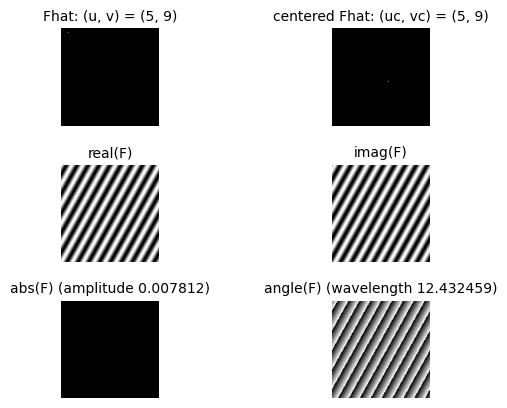

In [2]:
fftwave(5, 9)

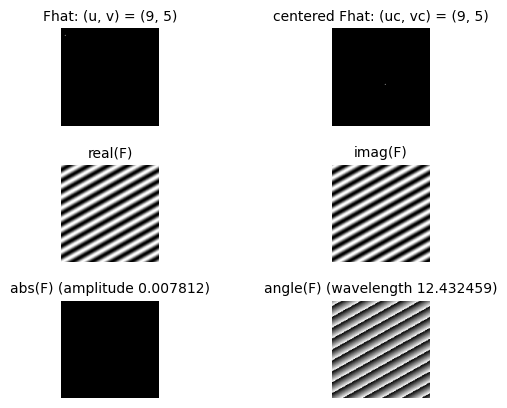

In [3]:
fftwave(9, 5)

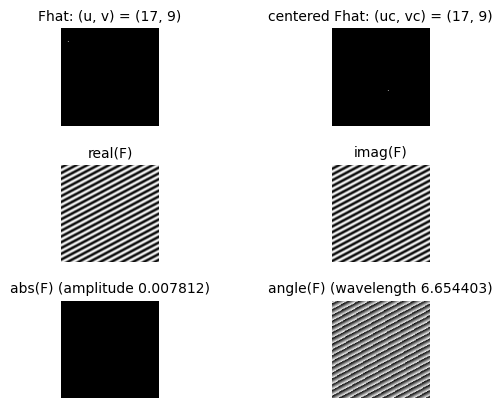

In [4]:
fftwave(17, 9)

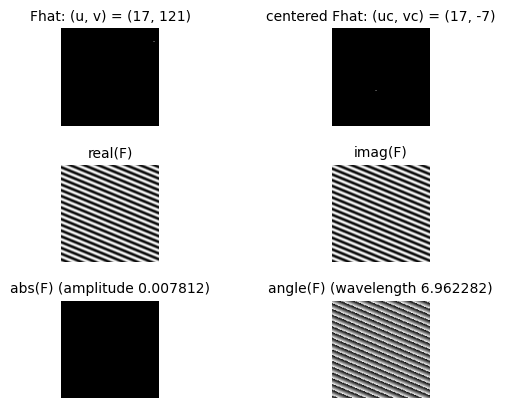

In [5]:
fftwave(17, 121)

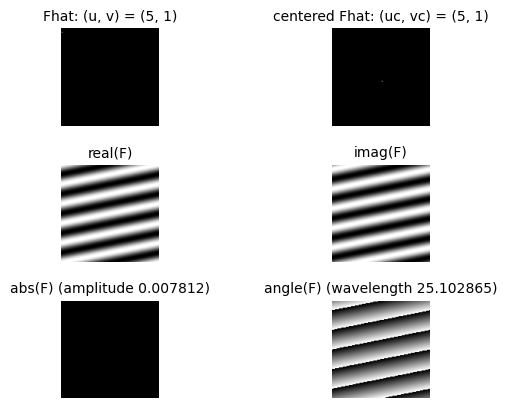

In [6]:
fftwave(5, 1)

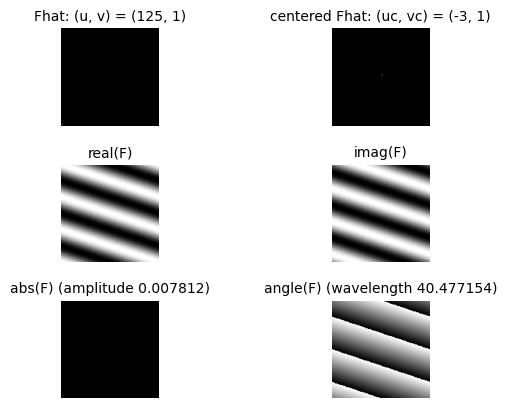

In [7]:
fftwave(125, 1)

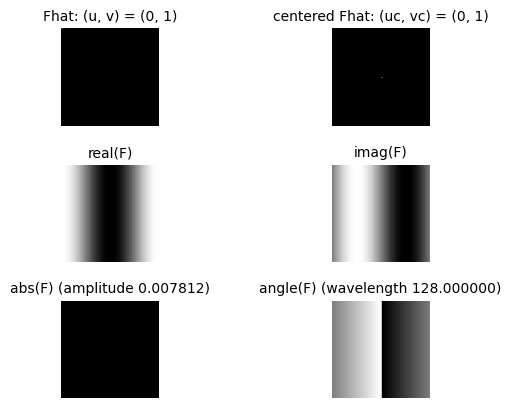

In [8]:
fftwave(0, 1)

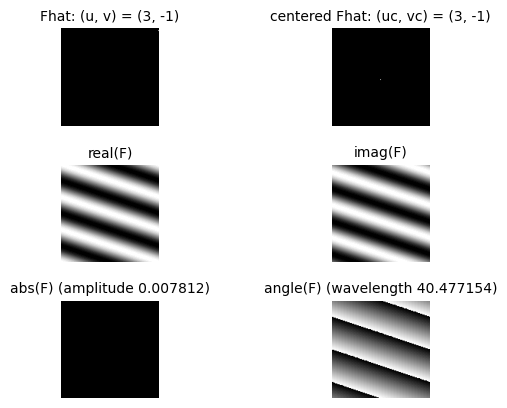

In [9]:
fftwave(3, -1)